In [1]:
# -*- coding: utf-8 -*-

#importacion de los modulos nesesarios para el script
%matplotlib inline
import sys, os
import pandas as pd
import matplotlib.pyplot as plot
import copy

In [2]:
#lista con el nombre de las fuerza policiacas
forces = os.listdir("./CrimesUK_2011_2017/2011-01")

#borramos lo necesario para quedarnos solo con el nombre de la fuerza
for i in range(len(forces)):
    forces[i] = forces[i][8:-11]

#lista con el nombre de todos los crimenes
crimes =['Burglary','Public order','Shoplifting','Drugs','Public disorder and weapons','Other crime','Anti-social behaviour','Other theft','Bicycle theft','Violent crime','Robbery','Vehicle crime','Violence and sexual offences','Criminal damage and arson','Theft from the person','Possession of weapons']

#lista para sumar los crimenes reportados por cada fuerza
forcesCrimes = [0] * len(forces)

#lista para sumar cuantas veces se reporto cada crimen
typesCrimes = [0] * len(crimes)

#lista para sumar los crimenes reportados de cada fuerza policiaca por cada tipo de crimen 
forcesTypeCrimes = [0] * len(forces)
for i in range(len(forces)):
    forcesTypeCrimes[i] = [0] * len(crimes) 
    
#lista para sumar los crimenes reportados de cada tipo de crimen por cada mes
monthTypeCrimes = [0] * len(crimes)
for i in range(len(crimes)):
    monthTypeCrimes[i] = [0] * 12

#variable para contar el numero total de reportes de crimenes
totalCrimes = 0.0

In [3]:
#ciclo para abrir recorrer los archivos por año
for i in ["2011-","2012-","2013-","2014-","2015-","2016-","2017-"]:
    #ciclo para abrir los archivos mes por mes
    for j in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
        #ciclo para abrir los archivos fuerza por fuerza 
        for k in range(len(forces)):
            
            #abrimos el archivo mediantes pandas para obtener un dataframe
            dataset = pd.read_csv("./CrimesUK_2011_2017/"+i+j+"/"+i+j+"-"+forces[k]+"-street.csv", header=0)
            
            #contamos el numero de lineas y lo sumamos en totalCrimes
            totalCrimes += len(dataset)
            
            #contamos el numero de filas del dataFrame y lo sumamos a la fuerza policiaca correspondiente
            forcesCrimes[k] += len(dataset)

            #for para contar para un archivo el numero de crimen registrado para cada uno de los crimenes
            for l in range(len(crimes)):
                #contamos el numero de filas del dataFrame que correspondan a un tipo de crimen determinado 
                typesCrimes[l] += len(dataset[dataset["Crime type"] == crimes[l]]) 
                
                #contamos el numero de filas del dataFrame y lo sumamos en su posicion correspodiente a la fuerza 
                #y el tipo de crimen
                forcesTypeCrimes[k][l] += len(dataset[dataset["Crime type"] == crimes[l]])
                
                #obtenemos el mes del reporte
                month = (int)(j)

                #contamos el numero de filas del dataFrame y lo sumamos en su posicion correspondiente a al tipo 
                #de crimen y el mes en que se reportaron
                monthTypeCrimes[l][month-1] += len(dataset[dataset["Crime type"] == crimes[l]])

# Grafica De La Pregunta 5

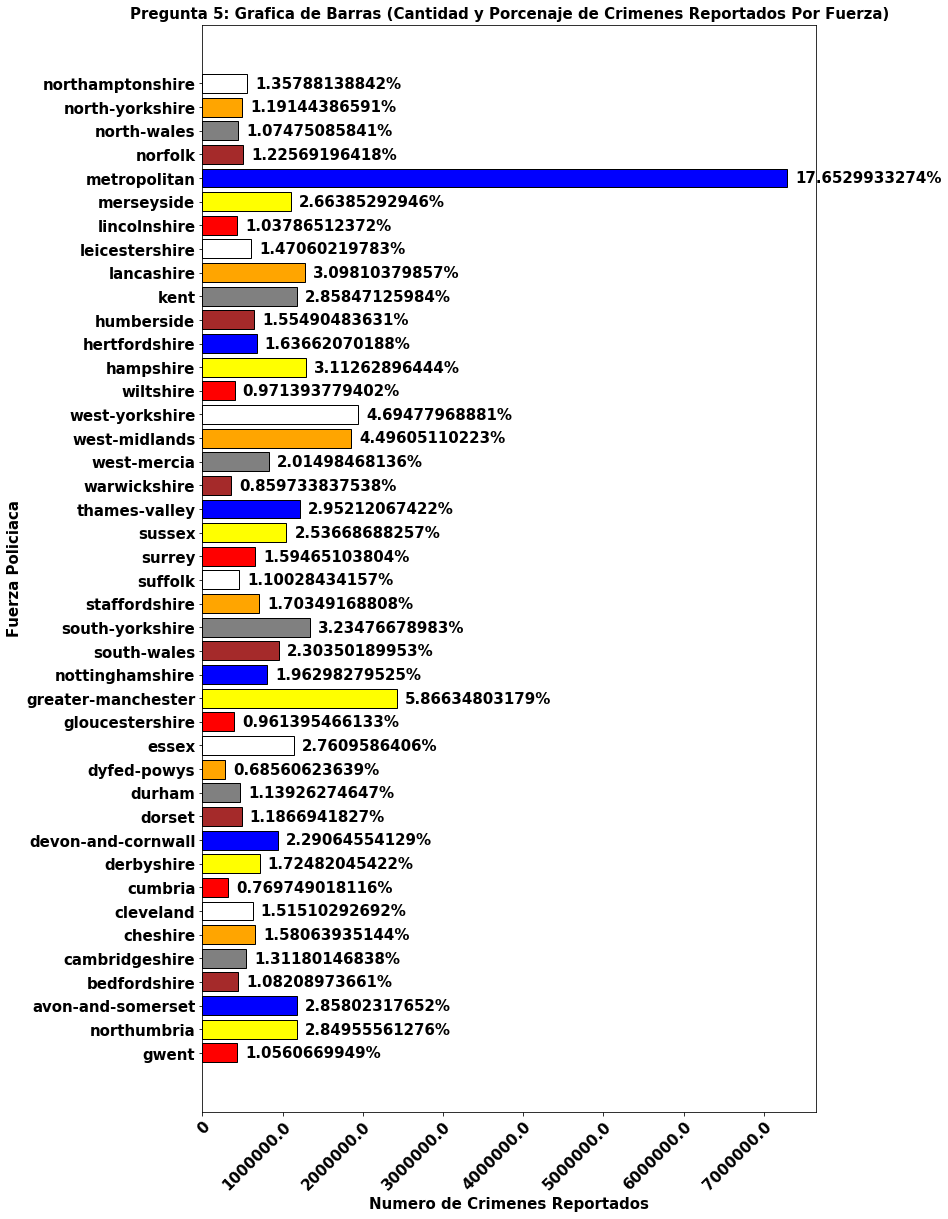

In [4]:
#creamos la figura para mostrar la grafica de la pregunta 5
fig = plot.figure(figsize=(11,20))
ax = fig.add_subplot(111)

#obtenemos el numeros de barras que se van a crear
numBar = range(len(forces))

#creamos la grafica de barras
ax.barh(numBar, forcesCrimes, color=["red","yellow","blue","brown","gray","orange","white"], edgecolor=["black"] * len(forces) , height=0.8,align="center")

#asignamos la ubicacion y las etiquetas del eje y
ax.set_yticks(numBar)
ax.set_yticklabels(forces,fontsize=15,fontweight="bold")

#asignamos la ubicacion y las etiquetas del eje x
ax.set_xticks([0,1e6,2e6,3e6,4e6,5e6,6e6,7e6])
ax.set_xticklabels([0,1e6,2e6,3e6,4e6,5e6,6e6,7e6],fontsize=15,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

#asignacion de los titulos a los ejes y a la grafica
plot.ylabel("Fuerza Policiaca",fontsize=15,fontweight="bold")
plot.xlabel("Numero de Crimenes Reportados",fontsize=15,fontweight="bold")
plot.title("Pregunta 5: Grafica de Barras (Cantidad y Porcenaje de Crimenes Reportados Por Fuerza)",fontsize=15,fontweight="bold")

#obtenemos las barras creadas en la grafica
rects = ax.patches

#variable para guardar el porcentaje de reporte de crimenes por cada fuerza
labels = []

#ciclo para obtener las etiqueta de cada barra
for i in forcesCrimes:
    labels.append((str)((i/totalCrimes)*100))

#ciclo para poner en la posicion correcta cada etiqueta en su respectiva barra
for rect, label, i in zip(rects,labels,numBar):    
    ax.text(rect.get_width() + 100000,i-0.2,label+"%",fontsize=15,fontweight="bold")

#mostramos la figura
plot.show()

# Grafica De La Pregunta 6

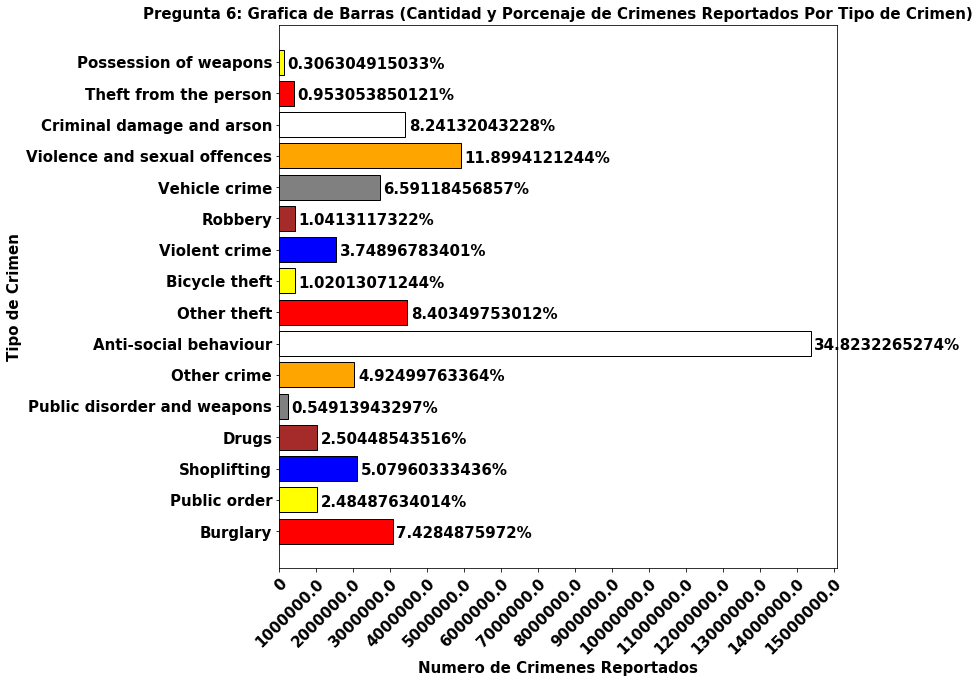

In [5]:
#creamos la figura para mostrar la grafica
fig = plot.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#obtenemos el numeros de barras qe de van a crear
numBar = range(len(crimes))

#creamos la grafica de barras
ax.barh(numBar, typesCrimes, color=["red","yellow","blue","brown","gray","orange","white"], edgecolor=["black"] * len(forces) , height=0.8,align="center")

#asignamos la ubicacion y las etiquetas del eje y
ax.set_yticks(numBar)
ax.set_yticklabels(crimes,fontsize=15,fontweight="bold")

#asignamos la ubicacion y las etiquetas del eje x
ax.set_xticks([0,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,10e6,11e6,12e6,13e6,14e6,15e6])
ax.set_xticklabels([0,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,10e6,11e6,12e6,13e6,14e6,15e6],fontsize=15,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

plot.ylabel("Tipo de Crimen",fontsize=15,fontweight="bold")
plot.xlabel("Numero de Crimenes Reportados",fontsize=15,fontweight="bold")
plot.title("Pregunta 6: Grafica de Barras (Cantidad y Porcenaje de Crimenes Reportados Por Tipo de Crimen)",fontsize=15,fontweight="bold")

#obtenemos las barras creadas en la grafica
rects = ax.patches

#variable para guardar el porcentaje de reporte de crimenes por cada fuerza
labels = []
    
#ciclo para obtener las etiqueta de cada barra
for i in typesCrimes:
    labels.append((str)((i/totalCrimes)*100))
        
#ciclo para poner en la posicion correcta cada etiqueta en su respectiva barra
for rect, label, i in zip(rects,labels,numBar):    
    ax.text(rect.get_width() + 100000,i-0.2,label+"%",fontsize=15,fontweight="bold")

#mostramos la figura
plot.show()

# Grafica De La Pregunta 7

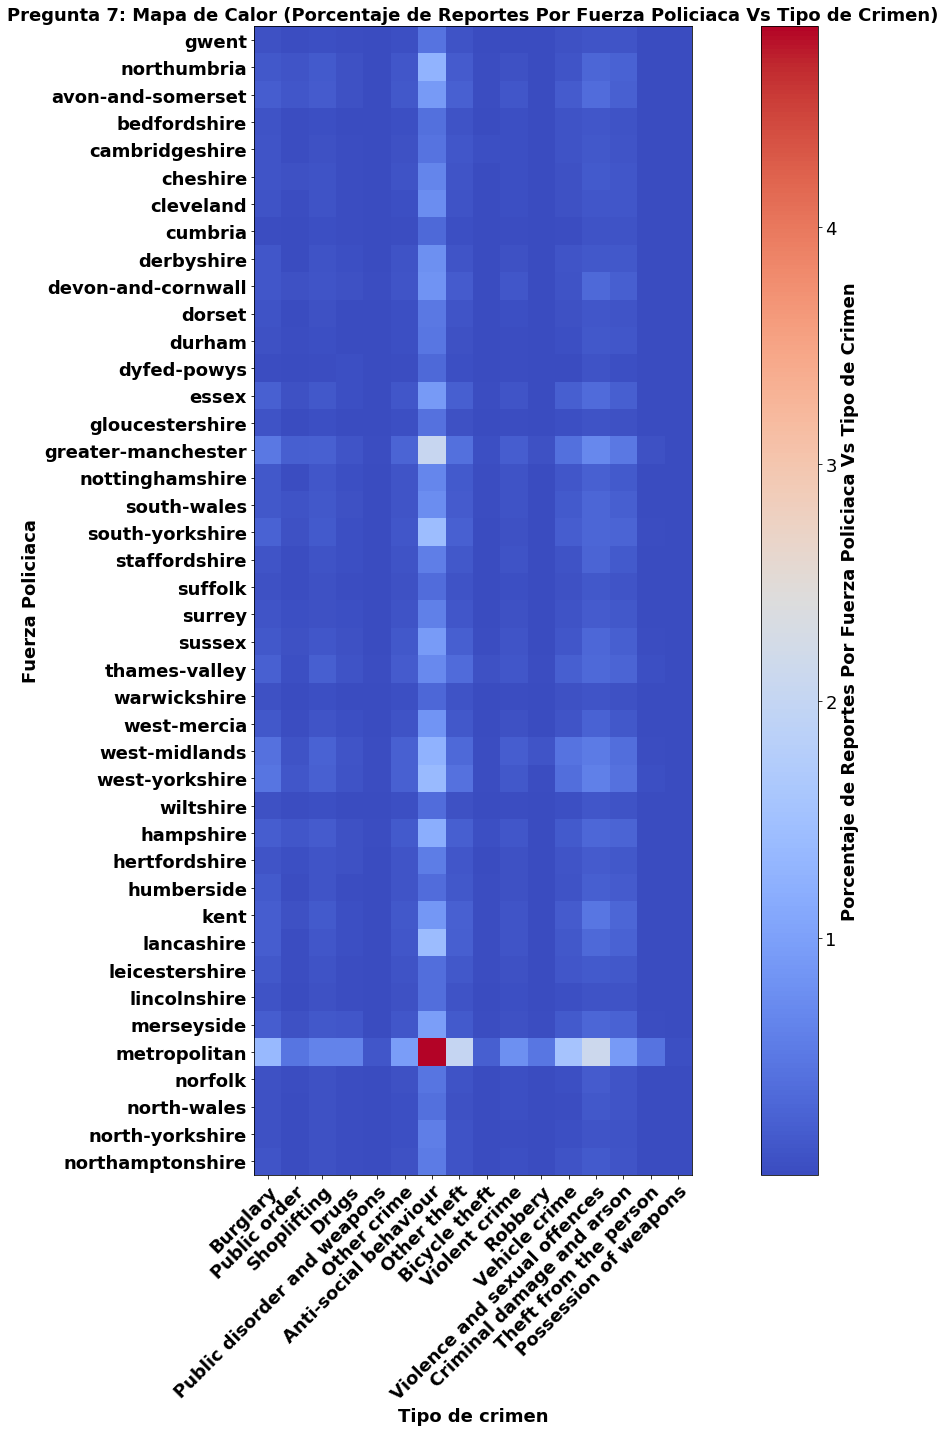

In [23]:
#hacemos una copia de forcesTypeCrimes 
Q7 = copy.deepcopy(forcesTypeCrimes)

#ciclos para obtener el porcentaje de reportes de crimenes para cada fuerza para un determinado tipo de crimen
for i in range(len(Q7)):
    for j in range(len(Q7[0])):
        Q7[i][j] = round((Q7[i][j]/totalCrimes)*100,3)

#creamos la figura para mostrar la el mapa de calor de la pregunta 7
fig = plot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

#creamos el mapa de calor 
heatmap = ax.imshow(Q7)

#asignamos el estilo en que se mostrara el mapa de calor
plot.set_cmap("coolwarm")

#establecemos las posiciones de las etiquetas de los ejes x y y
ax.set_xticks(range(len(crimes)))
ax.set_yticks(range(len(forces)))

#saignamos las etiquetas para los ejes x y y
ax.set_xticklabels(crimes,fontsize=18,fontweight="bold")
ax.set_yticklabels(forces,fontsize=18,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

#establecemos los titulos de los ejes y de la figura
plot.title("Pregunta 7: Mapa de Calor (Porcentaje de Reportes Por Fuerza Policiaca Vs Tipo de Crimen)",fontsize=18,fontweight="bold")
plot.xlabel("Tipo de crimen",fontsize=18,fontweight="bold")
plot.ylabel("Fuerza Policiaca",fontsize=18,fontweight="bold")

#configuramos la barra de color de referencia del mapa de calor
cb = plot.colorbar(heatmap) 
cb.set_label("Porcentaje de Reportes Por Fuerza Policiaca Vs Tipo de Crimen",weight='bold',size=18)
cb.ax.tick_params(labelsize=18)
fig.tight_layout()

#mostramos la figura
plot.show()

In [7]:
#convertimo la matriz Q7 en un dataframe
Q7dataFrame = pd.DataFrame(Q7,columns=crimes,index=forces)

#y exportamos su informacion a un csv
Q7dataFrame.to_csv("Contingency_Table_Q7.csv")

# Grafica Pregunta 8

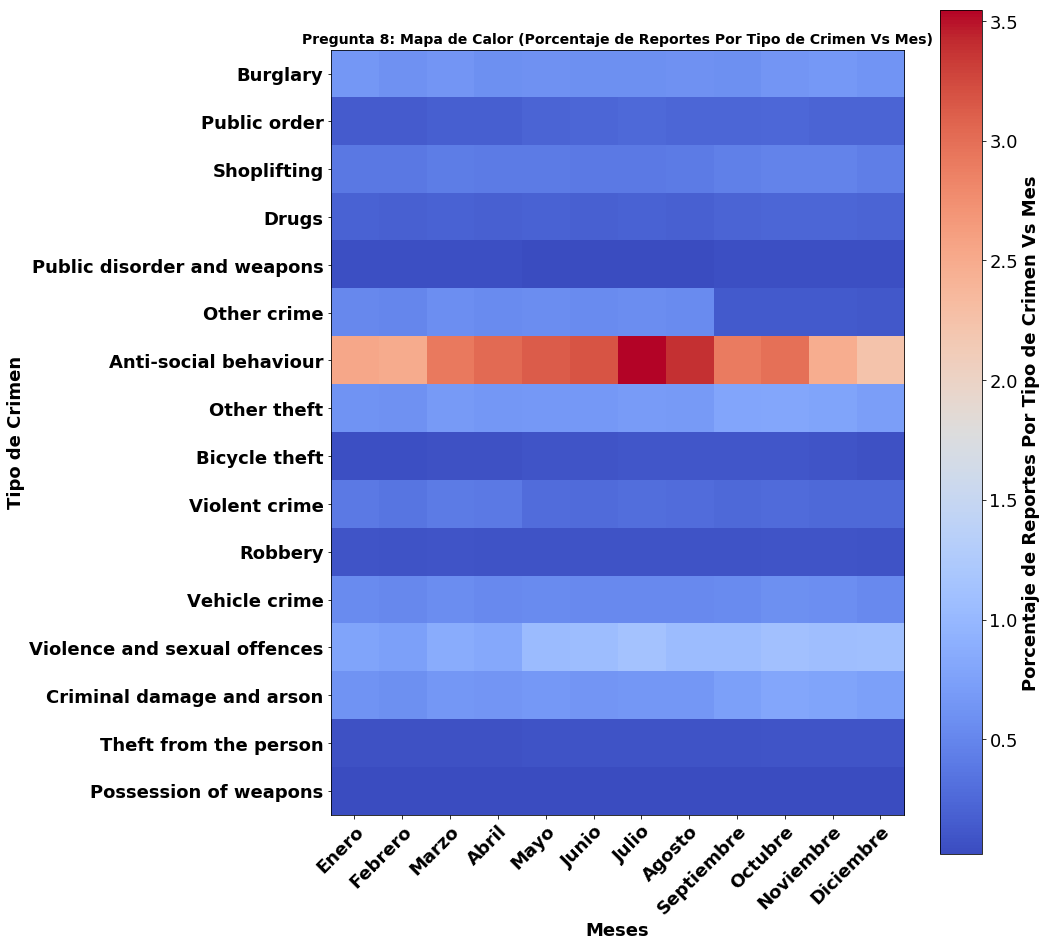

In [28]:
#lista con el nombre de los meses
months = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

#hacemos una copia de monthTypeCrimes 
Q8 = copy.deepcopy(monthTypeCrimes)

#ciclos para obtener el porcentaje de reportes de crimenes para cada tipo de crimen para un determinado mes 
for i in range(len(Q8)):
    for j in range(len(Q8[0])):
        Q8[i][j] = round((Q8[i][j]/totalCrimes)*100,3)

#creamos la figura para mostrar el mapa de calor de la pregunta 8
fig = plot.figure(figsize=(14,14))
ax = fig.add_subplot(111)

#creamos el mapa de calor
heatmap = ax.imshow(Q8)

plot.set_cmap("coolwarm")

#establecemos las posiciones de las etiquetas de los ejes x y y
ax.set_xticks(range(len(months)))
ax.set_yticks(range(len(crimes)))

#asignamos las etiquetas para los ejes x y y
ax.set_xticklabels(months,fontsize=18,fontweight="bold")
ax.set_yticklabels(crimes,fontsize=18,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

#establecemos los titulos de la figura y de los ejes
plot.title("Pregunta 8: Mapa de Calor (Porcentaje de Reportes Por Tipo de Crimen Vs Mes)",fontsize=14,fontweight="bold")
plot.xlabel("Meses",fontsize=18,fontweight="bold")
plot.ylabel("Tipo de Crimen",fontsize=18,fontweight="bold")

#configuramos la barra de color de referencia del mapa de calor
cb = plot.colorbar(heatmap) 
cb.set_label("Porcentaje de Reportes Por Tipo de Crimen Vs Mes",weight='bold',size=18)
cb.ax.tick_params(labelsize=18)
fig.tight_layout()

#mostramos la figura
plot.show()

In [19]:
#convertimos la matriz Q8 en un dataframe
Q8dataFrame = pd.DataFrame(Q8,columns=months,index=crimes)

#y exportamos su informacion en un csv
Q8dataFrame.to_csv("Contingency_Table_Q8.csv")